<a href="https://colab.research.google.com/github/diegobnh/odroid/blob/master/Select_PerformanceCounters_ARM32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selecting Performance Monitor Counter (pmc) on ARM Architecture


33 pmcs were analyzed in total from little core. Each execution only 4 pmcs were collected. 

56 pmcs were analyzed in total from big core. Each execution only 6 pmcs were collected.

In [0]:
from google.colab import drive 
drive.mount('/mntDrive')

After collecting all performance counters, a dataset was created containing the average of each performance counter for each application.

In [77]:
import pandas as pd

path = "/mntDrive/My Drive/Doutorado - Resultados/Feature Selection/data/4b (1).csv"
df = pd.read_csv(path)

df.head(8)


,L1I_CACHE_REFILL:0x01,L1I_TLB_REFILL:0x02,L1D_CACHE_REFILL:0x03,L1D_CACHE_ACCESS:0x04,L1D_TLB_REFILL:0x05,INSTR_RETIRED:0x08,EXC_TAKEN:0x09,BR_MIS_PRED:0x10,BR_PRED:0x12,MEM_ACCESS:0x13,L1I_CACHE_ACCESS:0x14,L1D_CACHE_WB:0x15,L2D_CACHE_ACCESS:0x16,L2D_CACHE_REFILL:0x17,L2D_CACHE_WB:0x18,BUS_ACCESS:0x19,INST_SPEC:0x1B,BUS_CYCLES:0x1D,L1D_CACHE_LD:0x40,L1D_CACHE_ST:0x41,L1D_CACHE_REFILL_LD:0x42,L1D_CACHE_REFILL_ST:0x43,L1D_CACHE_WB_VICTIM:0x46,L1D_CACHE_WB_CLEAN:0x47,L1D_CACHE_INVAL:0x48,L1D_TLB_REFILL_LD:0X4C,L1D_TLB_REFILL_ST:0X4D,L2D_CACHE_LD:0x50,L2D_CACHE_ST:0x51,L2D_CACHE_REFILL_LD:0x52,L2D_CACHE_REFILL_ST:0x53,L2D_CACHE_WB_VICTIM:0x56,L2D_CACHE_INVAL:0x58,BUS_ACCESS_LD:0x60,BUS_ACCESS_ST:0x61,BUS_ACCESS_SHARED:0x62,BUS_ACCESS_NORMAL:0x64,MEM_ACCESS_LD:0x66,MEM_ACCESS_ST:0X67,UNALIGNED_LD_SPEC:0x68,UNALIGNED_ST_SPEC:0x69,UNALIGNED_LDST_SPEC:0x6A,LDREX_SPEC:0x6C,STREX_PASS_SPEC:0x6D,STREX_FAIL_SPEC:0x6E,LD_SPEC:0x70,ST_SPEC:0x70,LDST_SPEC:0x72,DP_SPEC:0x73,ASE_SPEC:0x74,VFP_SPEC:0x75,PC_WRITE_SPEC:0x76,BR_IMMED_SPEC:0x78,BR_RETURN_SPEC:0x79,BR_INDIRECT_SPEC:0x7A,DMB_SPEC:0x7E,speedup4l,speedup4b,speedup4b4l
0,0.000967,0.000020,0.006457,0.180469,0.001909,1.049162,0.000002,0.003541,0.232298,0.181512,0.121381,0.002362,0.014382,0.000732,1.168278e-04,0.003408,1.167622,0.199992,0.154636,0.026783,0.004001,0.002229,0.000357,1.954609e-03,3.063404e-03,0.001572,0.000320,0.009117,0.005174,0.000622,1.076291e-04,1.182980e-04,1.006623e-06,0.002930,0.000485,0.003415,0.003456,0.154915,0.026531,0.000387,0.000483,0.000869,0.002246,0.000890,4.377351e-04,0.169820,0.024258,0.190963,0.722046,0.000001,1.159464e-02,0.232842,0.230077,0.001622,0.002769,0.001620,1.026143,1,0.507074
1,0.001339,0.000032,0.006609,0.195773,0.000152,0.824712,0.000278,0.003916,0.194102,0.188590,0.145057,0.002792,0.015873,0.000011,2.538462e-06,0.000053,0.923499,0.199840,0.151092,0.045178,0.003251,0.002590,0.000138,1.916811e-03,3.260059e-03,0.000145,0.000007,0.009214,0.006783,0.000009,1.775148e-08,5.976331e-07,1.076923e-06,0.000009,0.000002,0.000011,0.000053,0.145433,0.046953,0.000863,0.000851,0.001714,0.002749,0.001824,2.471657e-04,0.160038,0.043988,0.199572,0.531840,0.000004,1.301775e-07,0.176333,0.169086,0.004177,0.007343,0.001578,0.996564,1,0.431696
2,0.001038,0.000033,0.008039,0.734961,0.000776,1.027466,0.000165,0.003599,0.095682,0.715828,0.292630,0.003836,0.032021,0.000015,5.283951e-06,0.000275,1.112027,0.199980,0.378611,0.340935,0.005892,0.002634,0.002946,7.186481e-04,8.231049e-04,0.000765,0.000107,0.009512,0.021465,0.000013,9.882716e-06,4.709259e-05,1.104938e-06,0.000646,0.000267,0.000914,0.000356,0.385936,0.347458,0.002805,0.000813,0.003619,0.001654,0.001528,1.925309e-05,0.383779,0.327591,0.709013,0.272425,0.000004,1.001049e-03,0.097997,0.089346,0.004305,0.008493,0.001656,0.481282,1,0.620715
3,0.000134,0.000014,0.005855,0.117148,0.000275,0.488417,0.000002,0.001294,0.093911,0.116356,0.078326,0.003762,0.013543,0.002115,1.956246e-03,0.016280,0.530124,0.200005,0.085776,0.031101,0.003947,0.001660,0.002331,1.422860e-03,1.673772e-03,0.000262,0.000021,0.008003,0.005433,0.002099,1.422807e-05,1.958211e-03,9.473684e-07,0.008462,0.007833,0.016294,0.016405,0.086287,0.031352,0.000541,0.000552,0.001093,0.001427,0.001082,7.505263e-05,0.090426,0.026878,0.115031,0.304605,0.000001,9.156018e-03,0.094109,0.091147,0.001875,0.002955,0.001430,0.799209,1,0.631349
4,0.001095,0.000015,0.005963,0.208453,0.000161,1.104104,0.000150,0.006148,0.261705,0.208724,0.190619,0.002102,0.011775,0.000004,9.633028e-07,0.000021,1.286617,0.202377,0.169423,0.039128,0.003502,0.002372,0.000241,1.762413e-03,3.000890e-03,0.000144,0.000024,0.007057,0.004565,0.000004,3.669725e-08,8.990826e-07,1.000000e-06,0.000015,0.000004,0.000020,0.000019,0.168636,0.039082,0.000468,0.000544,0.001012,0.002465,0.001293,3.448991e-04,0.188723,0.037926,0.223338,0.766204,0.000002,0.000000e+00,0.262549,0.256999,0.003112,0.005365,0.001952,1.072412,1,0.543900
5,0.000163,0.000040,0.003056,0.067829,0.002305,0.308422,0.000012,0.008274,0.06808

We need to select only 4 pmcs in little cluster and 6 pmcs in big cluster. The performance counters will be chose using two approache: Filther Method and Wrapper Method.

## Filter Method

### Analysing 4 little

In [0]:
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

g_perc_correc=0.60

path = "/mntDrive/My Drive/Doutorado - Resultados/Feature Selection/data/4l (1).csv"
df = pd.read_csv(path)


def show_relevant_pmc(target):
  cor_target = abs(correlation_matrix[target])     
  relevant_features = cor_target[cor_target > g_perc_correc]#return um object serie
  
  values = relevant_features.values #get values from object
  features_selected = relevant_features.keys() #get labels from object 

  result=[]
  for feature in zip(features_selected, values):
      result.append(feature)

  order_list = sorted(result,key=operator.itemgetter(1), reverse=True)
  for item in (order_list):
     if item[0] == 'speedup4b4l' or item[0] == 'speedup4b' or item[0] == 'speedup4l':
        pass
     else:        
        print(item)
  
  

correlation_matrix = df.corr()



First we will look the 4l configuration. Which performance counters most correlate with the target? The following pmcs were selected when the target is speedup 4b.

In [79]:

show_relevant_pmc("speedup4b")


('data_snooped:0xCA', 0.7959195663709044)
('br_pred:0x10', 0.7119812371131402)
('proc_return:0x0E', 0.6952119244860157)
('dcache_evic:0x15', 0.6540862089118552)
('inst_fetch_tlb_refill:0x02', 0.6209720028209184)


Now when the target is speedup 4b4l. Same pmcs were chosen to estimate performance in 4b and 4b4l configuration.


In [80]:
show_relevant_pmc("speedup4b4l")

('data_snooped:0xCA', 0.7570056677990541)
('br_pred:0x10', 0.7304957214798349)
('proc_return:0x0E', 0.7220656329349835)
('dcache_evic:0x15', 0.670444171287321)
('inst_fetch_refill:0x01', 0.620510631130267)
('no_cache_ext_mem_req:0xC1', 0.6093338350857119)


So far, no analysis has been done between the selected features. 

In [0]:
def plot_correlation_between_selected_features(target):
  cor_target = abs(correlation_matrix[target])     
  relevant_features = cor_target[cor_target > g_perc_correc]#return um object serie
 
  values = relevant_features.values #get values from object
  features_selected = relevant_features.keys() #get labels from object 

  temp = features_selected.tolist()
  list_selected_feature = []
  for i in temp: 
     if i == 'speedup4b4l' or i == 'speedup4b' or i == 'speedup4l':
        pass
     else:
        list_selected_feature.append(i)     

  new_data = data[list_selected_feature].corr()
  mask = np.zeros_like(new_data)
  mask[np.triu_indices_from(mask)] = True

  plt.figure(figsize=(20,15))

  sns.heatmap(new_data, mask=mask,annot=True, cmap=plt.cm.Blues, linewidth = .5)
  plt.subplots_adjust(bottom=0.3,left=0.25)
  plt.show()


The following image shows this correlation.

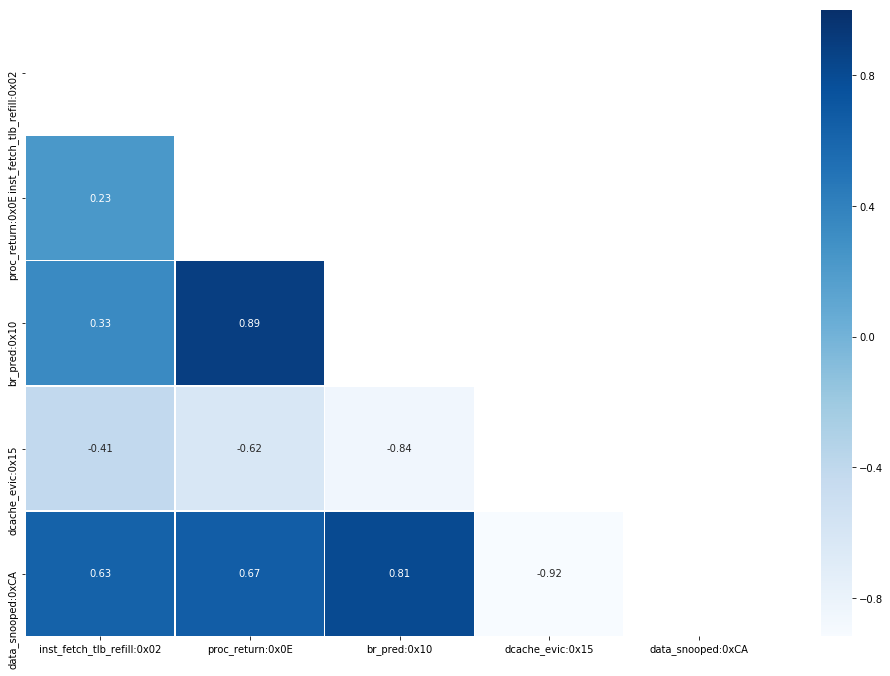

In [82]:
plot_correlation_between_selected_features("speedup4b")

### Analysing 4b

In [0]:
path = "/mntDrive/My Drive/Doutorado - Resultados/Feature Selection/data/4b (1).csv"
df = pd.read_csv(path)

show_relevant_pmc("speedup4l")